In [1]:
from pca import Pca
import numpy as np
from utils import load_from_numpy, load_mnist
import matplotlib.pyplot as plt

In [2]:
X, Y = load_mnist()
model = Pca(X=X, n_components=2)
res = model.fit()

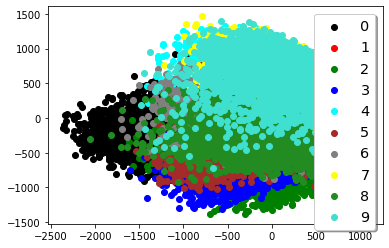

In [3]:
x = res[:,0]
y = res[:,1]
colors = ['black', 'red', 'green', 'blue', 'cyan', "brown", "gray", "yellow", "forestgreen", "turquoise"]

fig, ax = plt.subplots()
for k, color in enumerate(colors):
    x_plot = []
    y_plot = []
    for i, yy in enumerate(Y):
        if yy == k:
            x_plot.append(x[i])
            y_plot.append(y[i])
    ax.scatter(x_plot, y_plot, c = color, label=k)
    legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
    

In [4]:

# encoded = model.encode(X[0])

encoded = np.dot(X[0], model.main_composants)
encoded = model.encode(X[0])
print(np.shape(encoded))

# decoded = model.decode(encoded)

decoded = np.dot(encoded, np.transpose(model.main_composants))
print(np.shape(decoded))
decoded = np.reshape(decoded, (28, 28))



(2,)
(784,)


In [23]:
images = []
for x in range(-2500, 1000, 100):
    for y in range(-1500, 1500, 100):
        decoded = model.decode([x, y])
        decoded = np.reshape(decoded, (28, 28))
        images.append(decoded)

<ipython-input-24-6c22a6f6c71b>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


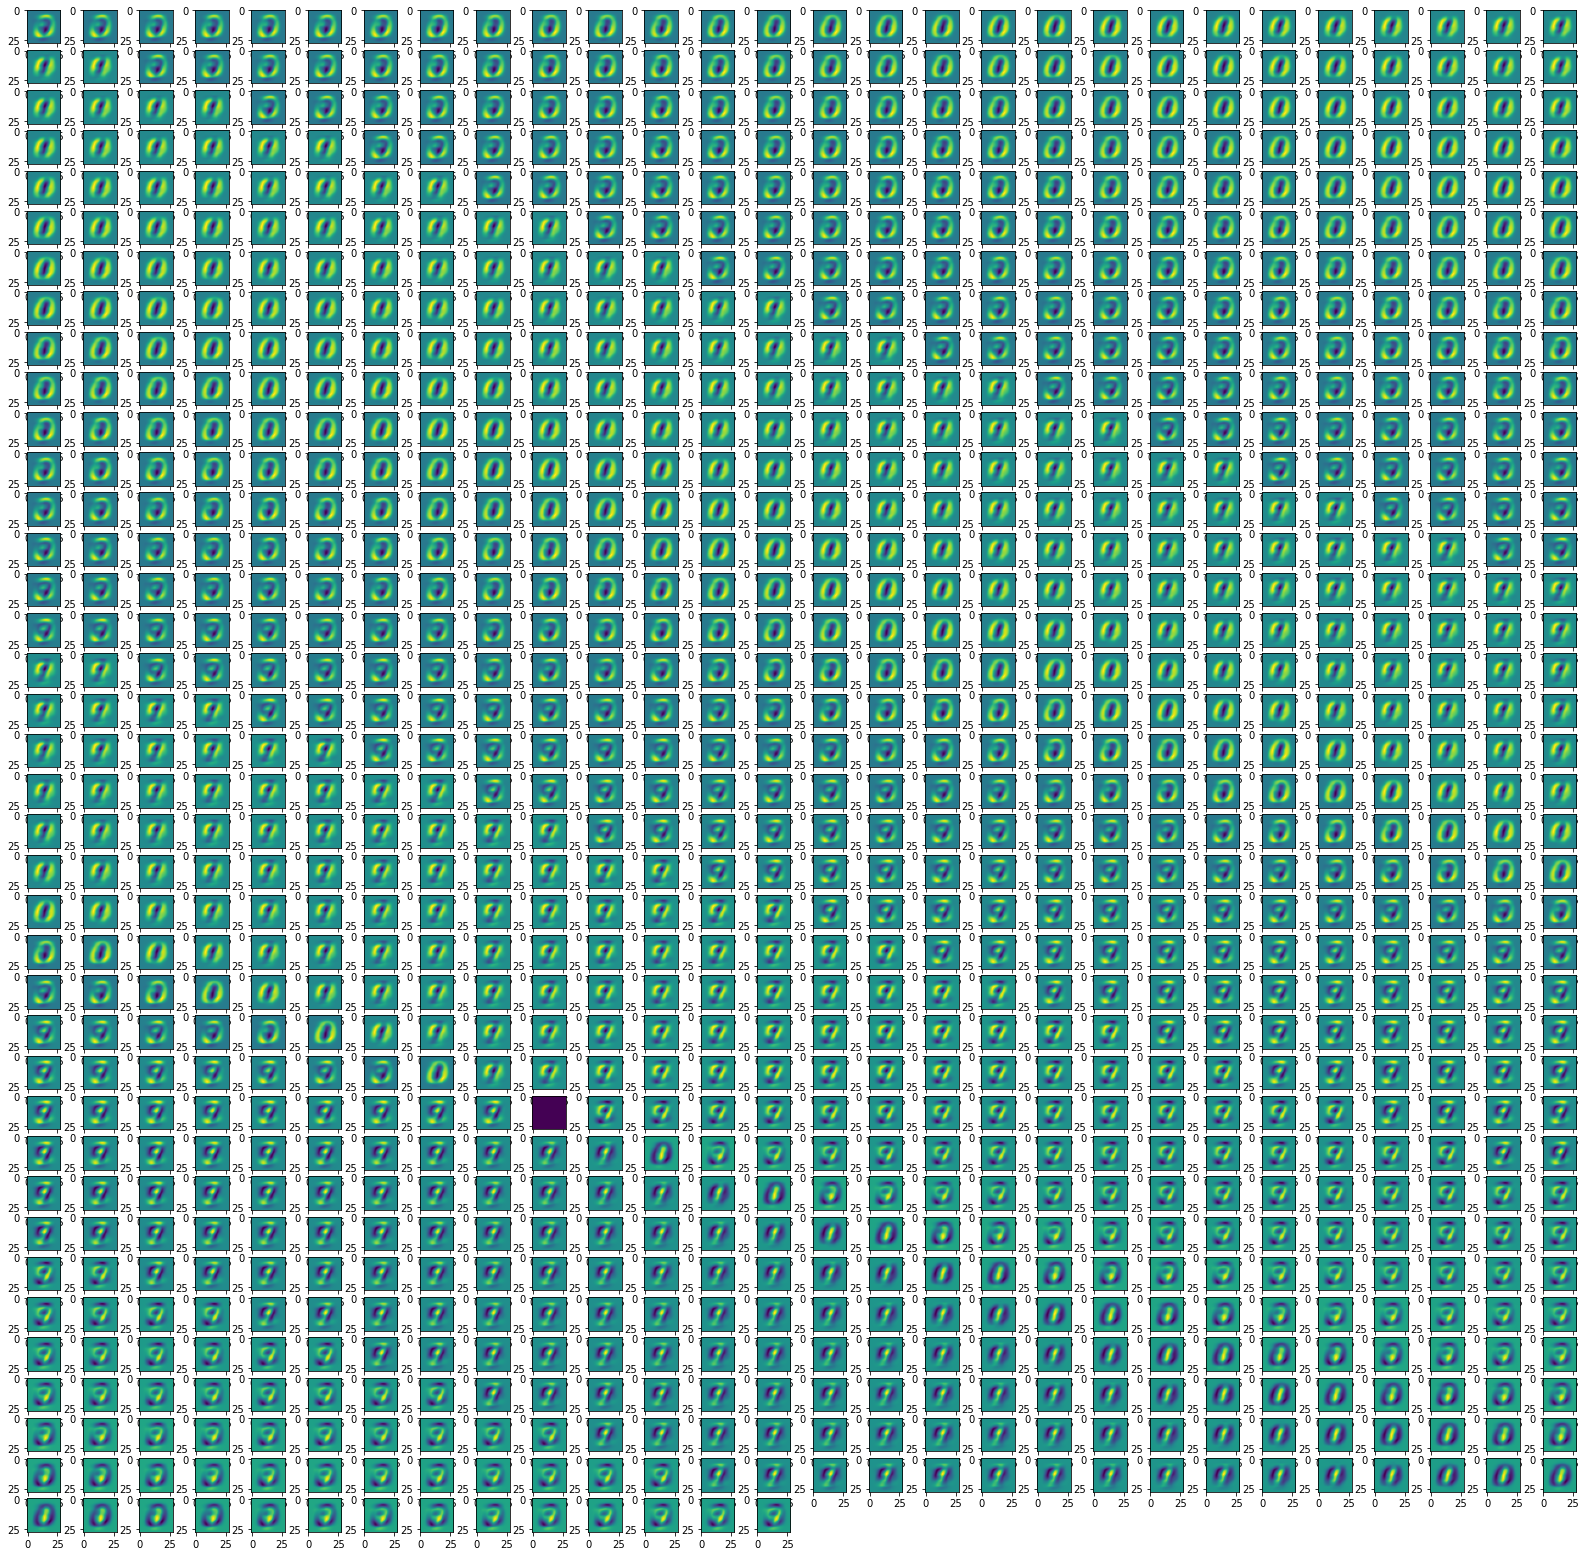

In [24]:
plt.figure(figsize=(28,28))
columns = 28
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)